In [1]:
#Exploracion de los datos
import numpy as np
import pandas as pd
from datetime import datetime
#Visualizaciones
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools
from IPython.display import display



In [2]:
pip show pycaret

Name: pycaretNote: you may need to restart the kernel to use updated packages.

Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: c:\users\aritz\anaconda3\envs\pycaret_env\lib\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, xxhash, yellowbrick
Required-by: 


In [3]:
# Carga dataset
store = pd.read_csv("C:/Users/aritz/Documents/UTP/Modelos Predictivos/Rossmann Store Sales/store.csv")


In [5]:
train = pd.read_csv("C:/Users/aritz/Documents/UTP/Modelos Predictivos/Rossmann Store Sales/train.csv",low_memory=False)

Exploración de datos de sales dataset

In [10]:
# Inspeccionar la columna 7
print(train.iloc[:, 7].unique())

['0' 'a' 'b' 'c']


In [12]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [14]:
store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [16]:
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [7]:
# nuevas features de fechas
train['Date'] = pd.to_datetime(train['Date'])

# Extrae las nuevas características de la columna 'Date'
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

In [20]:
train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31  
2              1  2015      7   31          31  
3              1  2015      7   31          31  
4              1  2015      7   31          31

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int32         
 10  Month          1017209 non-null  int32         
 11  Day            1017209 non-null  int32         
 12  WeekOfYear     1017209 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(3), int64(7), object(1)
memory usage: 86.3+ MB


In [9]:
# nueva variable ratios de ventas por clientes
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [11]:
train['SalePerCustomer'].value_counts().head(10)

SalePerCustomer
9.0     262
10.0    227
8.0     218
11.0    181
7.0     146
9.5     128
12.0    120
10.5    100
8.5      97
7.5      93
Name: count, dtype: int64

In [13]:
train.Year.unique()

array([2015, 2014, 2013])

In [15]:
#verificar nulls
train.isnull().sum()

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [19]:
# Revisar si los null corresponde ha cuando la tienda esta cerrada 
train[(train.Open == 0) & (train.Sales == 0)].shape

(172817, 14)

In [23]:
# tienda abiertas con ceros:
sales_0 = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", sales_0.shape)
sales_0.head(5)

In total:  (54, 14)


Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
86825     971          5 2015-05-15      0          0     1      0   
142278    674          4 2015-03-26      0          0     1      0   
196938    699          4 2015-02-05      0          0     1      1   
322053    708          3 2014-10-01      0          0     1      1   
330176    357          1 2014-09-22      0          0     1      0   

       StateHoliday  SchoolHoliday  Year  Month  Day  WeekOfYear  \
86825             0              1  2015      5   15          20   
142278            0              0  2015      3   26          13   
196938            0              0  2015      2    5           6   
322053            0              0  2014     10    1          40   
330176            0              0  2014      9   22          39   

        SalePerCustomer  
86825               NaN  
142278              NaN  
196938              NaN  
322053              NaN  
330176              NaN

In [25]:
# No considerar datos de tienda cerrada y sales en cero
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

In total:  (844338, 14)


In [27]:
train=train.drop(columns=train[(train.Open == 1) & (train.Sales == 0)].index)

In [29]:
{"Mean":np.mean(train.Sales),"Median":np.median(train.Sales)}


{'Mean': 6955.959133664481, 'Median': 6369.0}

In [31]:
train.Customers.describe()
#clientes con min 8 clientes y maximo 7,388. con un promedio por 762 clientes

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [44]:
# top 10 de clientes que visitan la tienda
train.nlargest(10, ['Customers'])

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
993496    817          2 2013-01-22  27190       7388     1      1   
319810    262          5 2014-10-03  35702       5494     1      1   
101726    262          5 2015-05-01  38484       5458     1      1   
432096    262          1 2014-06-09  34692       5387     1      0   
444361    262          4 2014-05-29  37403       5297     1      0   
87231     262          4 2015-05-14  38367       5192     1      0   
129601    262          1 2015-04-06  33655       5152     1      0   
745411    262          7 2013-09-01  32926       5145     1      0   
132946    262          5 2015-04-03  38722       5132     1      1   
776631    262          7 2013-08-04  32252       5112     1      0   

       StateHoliday  SchoolHoliday  Year  Month  Day  WeekOfYear  \
993496            0              0  2013      1   22           4   
319810            a              0  2014     10    3          40   
101726            a              0  2015      5    1          18   
432096            a              0  2014      6    9          24   
444361            a              0  2014      5   29          22   
87231             a              1  2015      5   14          20   
129601            b              0  2015      4    6          15   
745411            0              0  2013      9    1          35   
132946            b              0  2015      4    3          14   
776631            0              0  2013      8    4          31   

        SalePerCustomer  
993496         3.680292  
319810         6.498362  
101726         7.050934  
432096         6.439948  
444361         7.061167  
87231          7.389638  
129601         6.532415  
745411         6.399611  
132946         7.545207  
776631         6.309077

Exploración de los datos del dataset store

In [47]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [33]:
store.Store.shape

(1115,)

Hay 1,115 tiendas

In [36]:
#Datos null
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [38]:
#verificar null de competition distance
store[pd.isnull(store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [40]:
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

Se puede observar que falta datos en esta columna, se decide llenarlos con los valores de la media

In [43]:
# Filtrar las tiendas actualizadas
filtered_stores = store[store['Store'].isin([291, 622, 879])]
display(filtered_stores)

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a               2325.0   
621    622         a          c               2325.0   
878    879         d          a               2325.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

Si no hay promo la variable Promo2 no tiene información,
lo mismo ocurre con las otras variables CompetitionOpenSinceMonth y CompetitionOpenSinceYear.
Sustituimos estos valores en ceros

In [46]:
store.fillna(0, inplace = True)

In [48]:
#Revisión de nulls luego de ajustarlos
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [50]:
# Unimos el dataset de ventas con la informacion por cada store
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [52]:
# dataset final:
print("Dataset Total: ", train_store.shape)

Dataset Total:  (844338, 23)


In [54]:
train_store.head(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   
2      1          3 2015-07-29   4782        523     1      1            0   
3      1          2 2015-07-28   5011        560     1      1            0   
4      1          1 2015-07-27   6102        612     1      1            0   
5      1          6 2015-07-25   4364        500     1      0            0   
6      1          5 2015-07-24   3706        459     1      0            0   
7      1          4 2015-07-23   3769        503     1      0            0   
8      1          3 2015-07-22   3464        463     1      0            0   
9      1          2 2015-07-21   3558        469     1      0            0   

   SchoolHoliday  Year  ...  SalePerCustomer  StoreType  Assortment  \
0              1  2015  ...         9.482883          c           a   
1              1  2015  ...         9.194139          c           a   
2              1  2015  ...         9.143403          c           a   
3              1  2015  ...         8.948214          c           a   
4              1  2015  ...         9.970588          c           a   
5              0  2015  ...         8.728000          c           a   
6              0  2015  ...         8.074074          c           a   
7              0  2015  ...         7.493042          c           a   
8              0  2015  ...         7.481641          c           a   
9              0  2015  ...         7.586354          c           a   

   CompetitionDistance CompetitionOpenSinceMonth CompetitionOpenSinceYear  \
0               1270.0                       9.0                   2008.0   
1               1270.0                       9.0                   2008.0   
2               1270.0                       9.0                   2008.0   
3               1270.0                       9.0                   2008.0   
4               1270.0                       9.0                   2008.0   
5               1270.0                       9.0                   2008.0   
6               1270.0                       9.0                   2008.0   
7               1270.0                       9.0                   2008.0   
8               1270.0                       9.0                   2008.0   
9               1270.0                       9.0                   2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  
5       0              0.0              0.0              0  
6       0              0.0              0.0              0  
7       0              0.0              0.0              0  
8       0              0.0              0.0              0  
9       0              0.0              0.0              0  

[10 rows x 23 columns]

In [56]:
#Datos null
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
SalePerCustomer              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Analizamos tipos de tiendas y ventas individuales

In [59]:
pd.options.display.float_format = '{:,.2f}'.format
train_store.groupby('StoreType')['Sales'].describe()

count      mean      std      min      25%      50%       75%  \
StoreType                                                                      
a         457,042.00  6,925.70 3,277.35    46.00 4,695.25 6,285.00  8,406.00   
b          15,560.00 10,233.38 5,155.73 1,252.00 6,345.75 9,130.00 13,184.25   
c         112,968.00  6,933.13 2,896.96   133.00 4,916.00 6,408.00  8,349.25   
d         258,768.00  6,822.30 2,556.40   538.00 5,050.00 6,395.00  8,123.25   

                max  
StoreType            
a         41,551.00  
b         38,722.00  
c         31,448.00  
d         38,037.00

StoreType "b" tiene el promedio más alto de ventas entre todos los demás, el resto se ven muy cercano.

In [78]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

Customers       Sales
StoreType                       
a          363541431  3165334859
b           31465616   159231395
c           92129705   783221426
d          156904995  1765392943

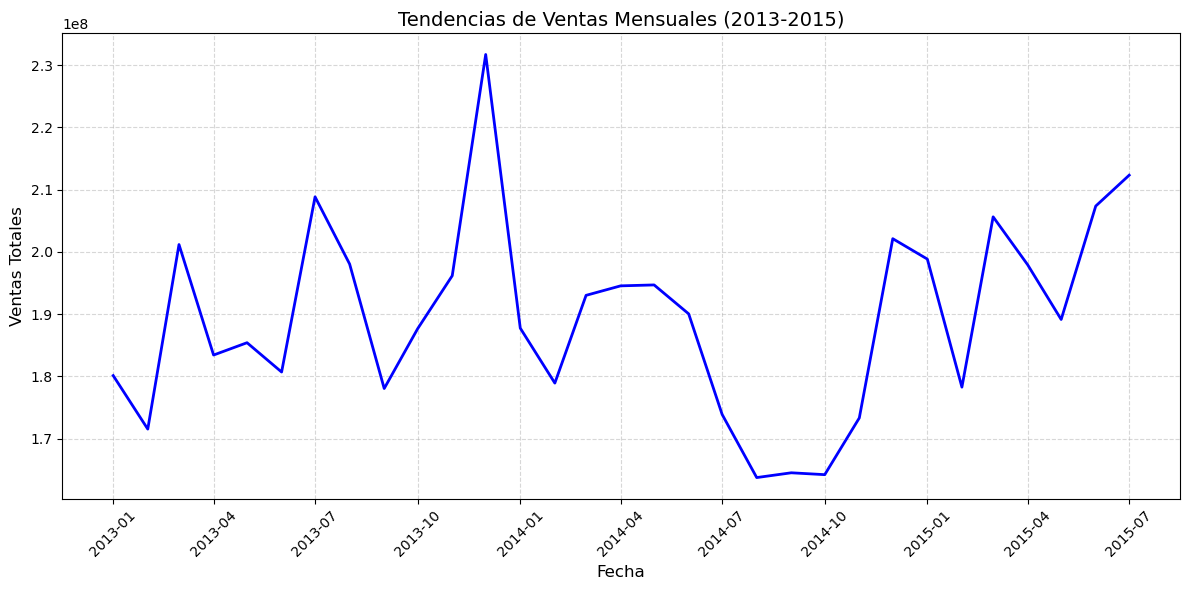

In [78]:


# Asegúrate de que la columna 'Date' esté en formato datetime
#train_store['Date'] = pd.to_datetime(train_store['Date'])

# Agrupar las ventas por Año y Mes
ventas_mensuales = train_store.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Crear una columna 'Mes-Año' para facilitar el gráfico
ventas_mensuales['Month-Year'] = pd.to_datetime(ventas_mensuales[['Year', 'Month']].assign(Day=1))

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['Month-Year'], ventas_mensuales['Sales'], color='blue', linewidth=2)

# Añadir etiquetas y título
plt.title('Tendencias de Ventas Mensuales (2013-2015)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Cuadrícula para mejorar la legibilidad
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.tight_layout()  # Ajustar el diseño
plt.savefig('tendencias_ventas_mensuales_año.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

El mayor número de visitas de clientes y de ventas se produjo en las tiendas de tipo A. La tienda de tipo D ocupa el segundo lugar tanto en ventas como en clientes.

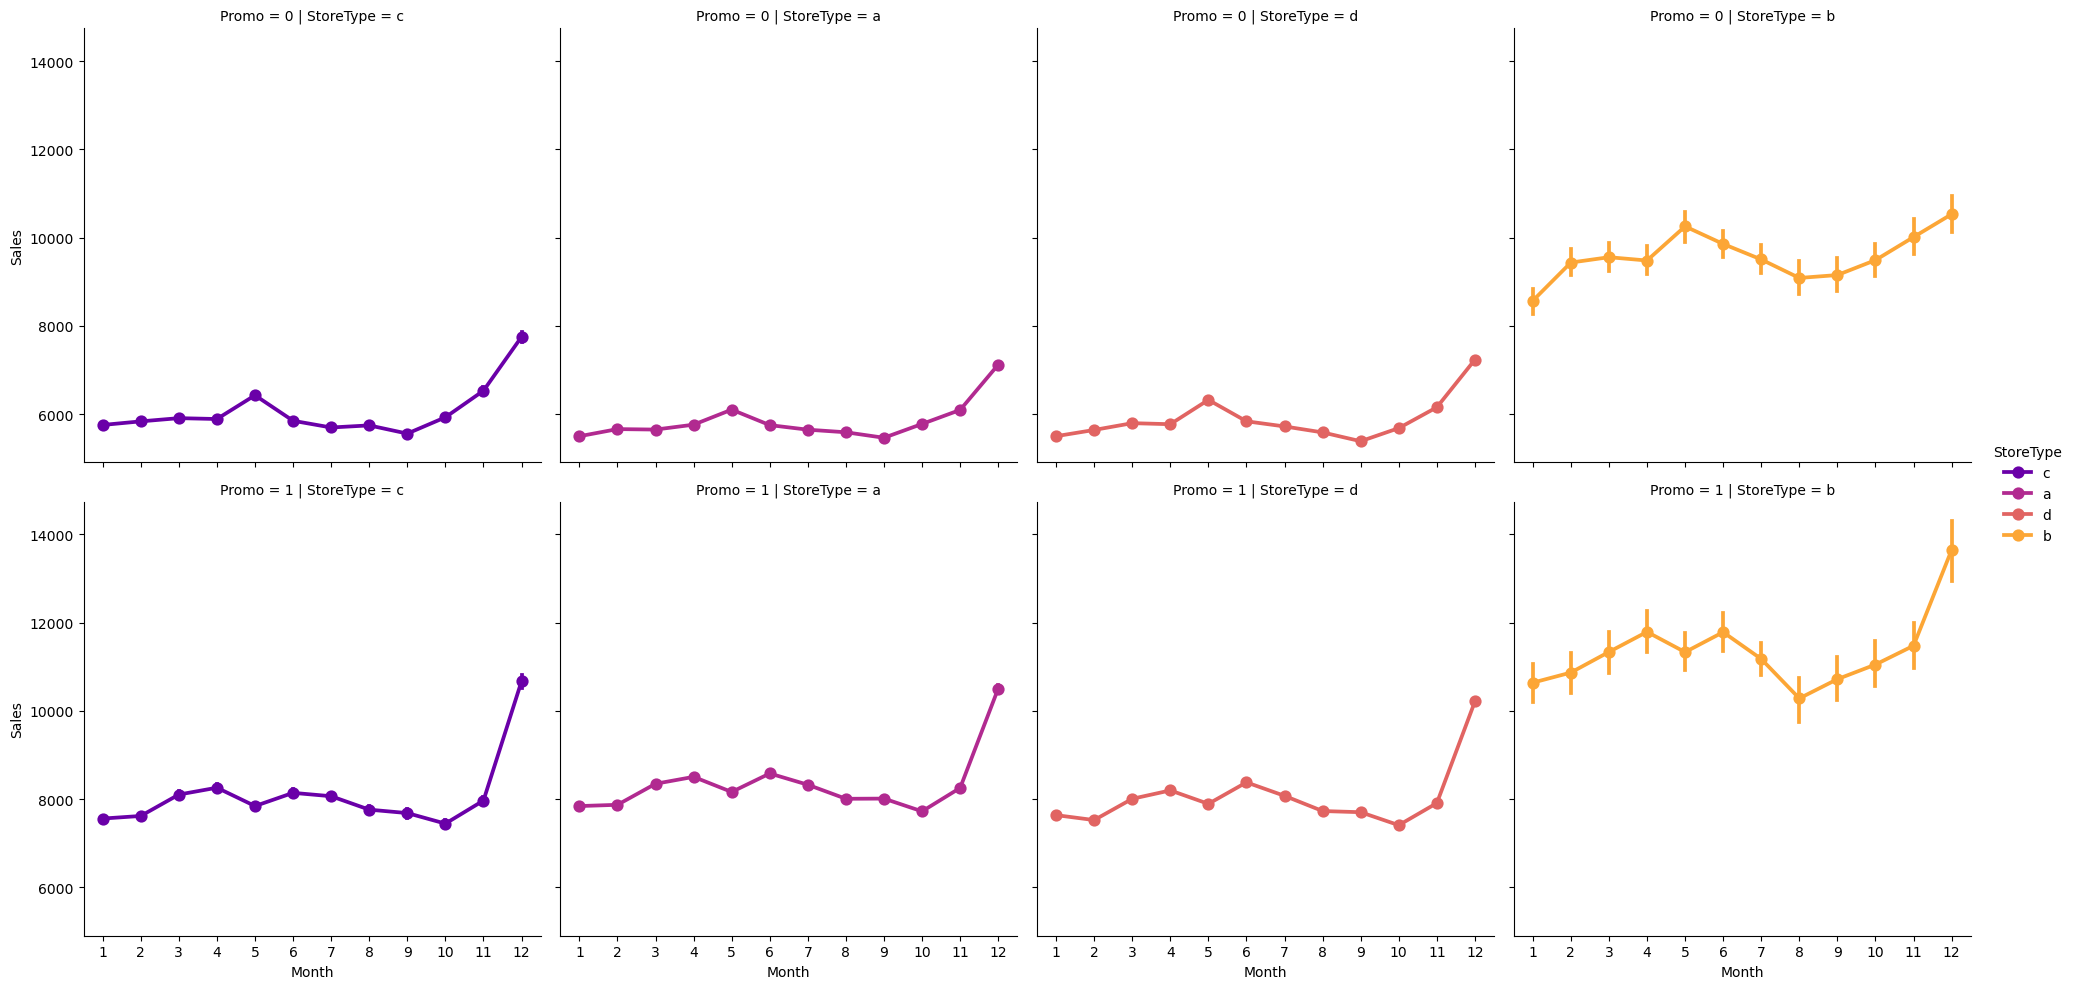

In [80]:
# Gráfico de tendencias de ventas
sns.catplot(
    data=train_store, 
    x='Month', 
    y='Sales', 
    col='StoreType',  # Crear columnas según StoreType
    palette='plasma', 
    hue='StoreType', 
    row='Promo',  # Crear filas según Promo
    kind='point'  # Usar tipo de gráfico de puntos
)
plt.savefig('tendencias_de_ventas.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

Las ventas mensuales son elevadas en el store "b" y en el último mes del año se obseva ventas mas altas, podría ser por navidad. y tambíen se observa un crecimiento cuando hay promociones.

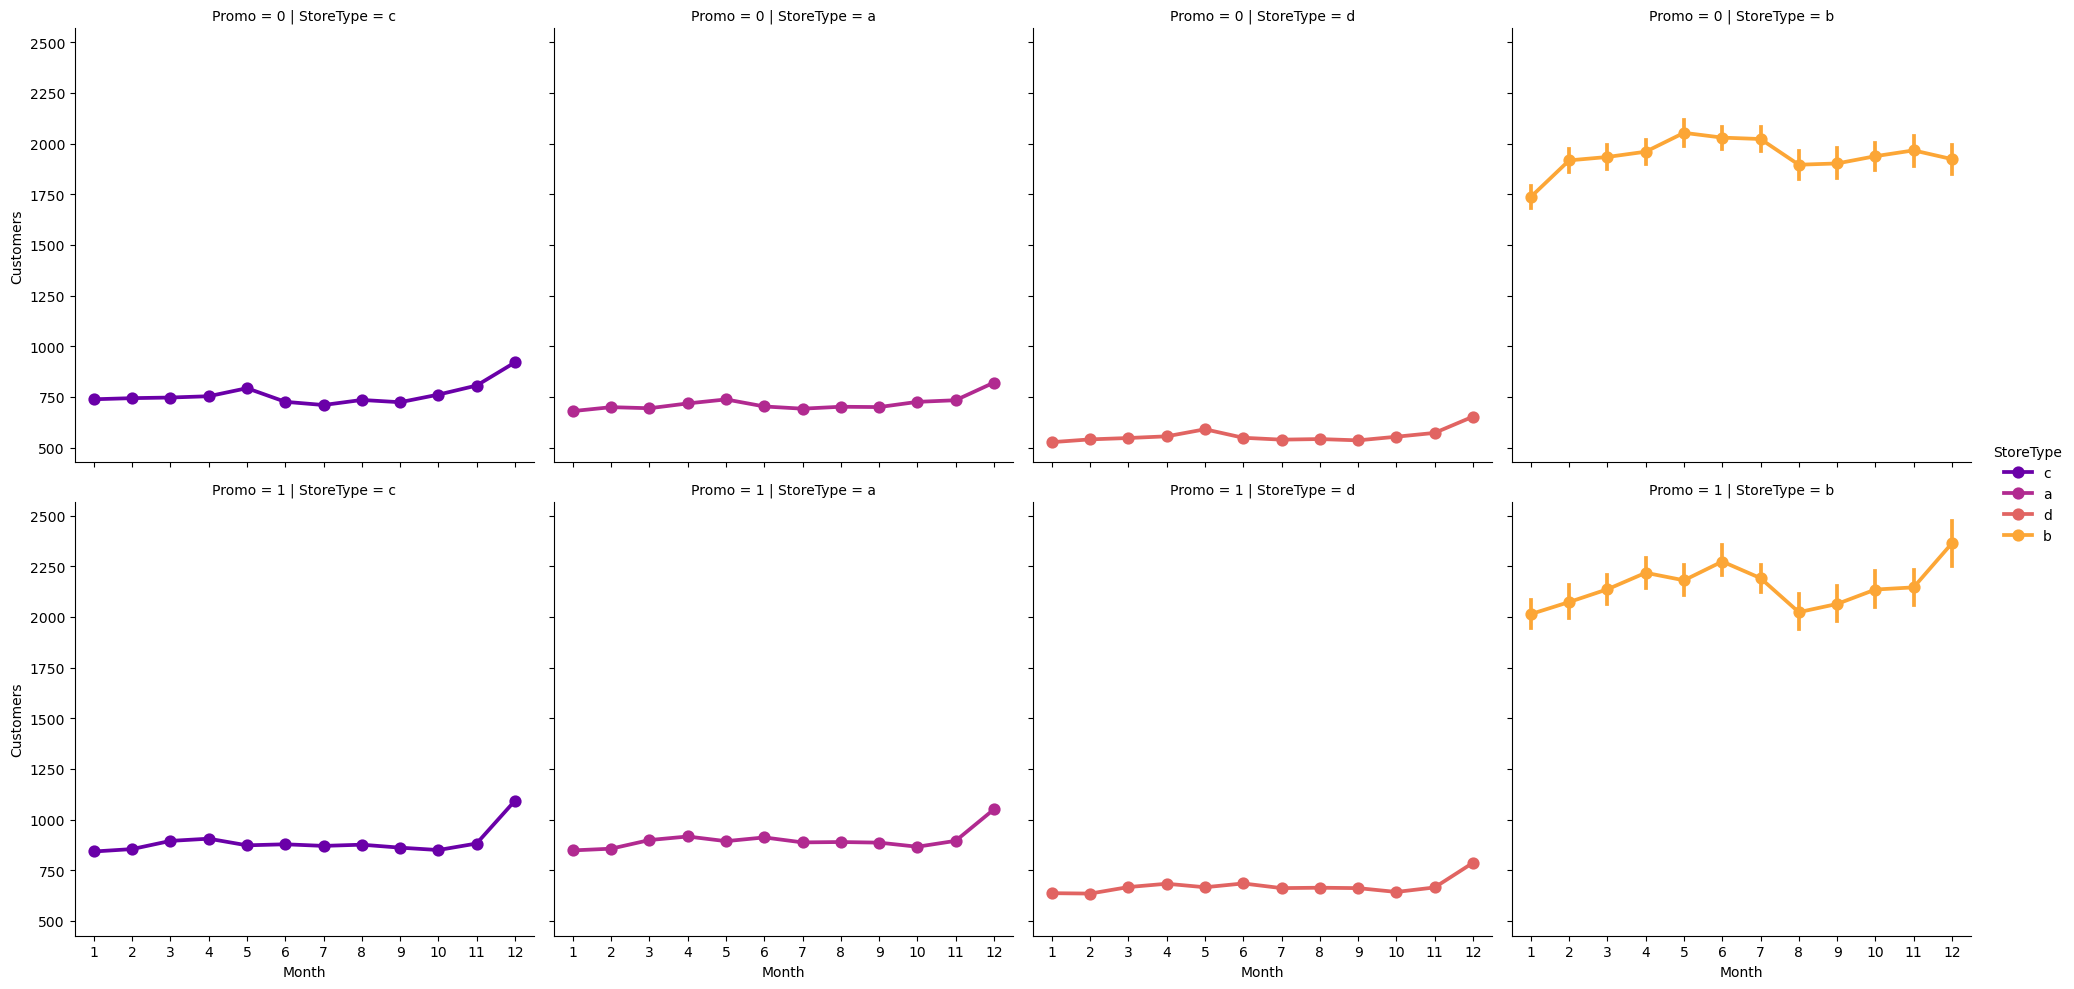

In [82]:
# Gráfico de tendencias de clientes
sns.catplot(
    data=train_store, 
    x='Month', 
    y='Customers', 
    col='StoreType',  # Crear columnas según StoreType
    palette='plasma', 
    hue='StoreType', 
    row='Promo',  # Crear filas según la promoción
    kind='point'  # Usar un gráfico de puntos
)
plt.savefig('tendencias_de_clientes.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

Si se observa un leve aumento en cliente cuando hay promociones en las tiendas. en las tiendas tipo "b" se puede observar un gran número de clientes.

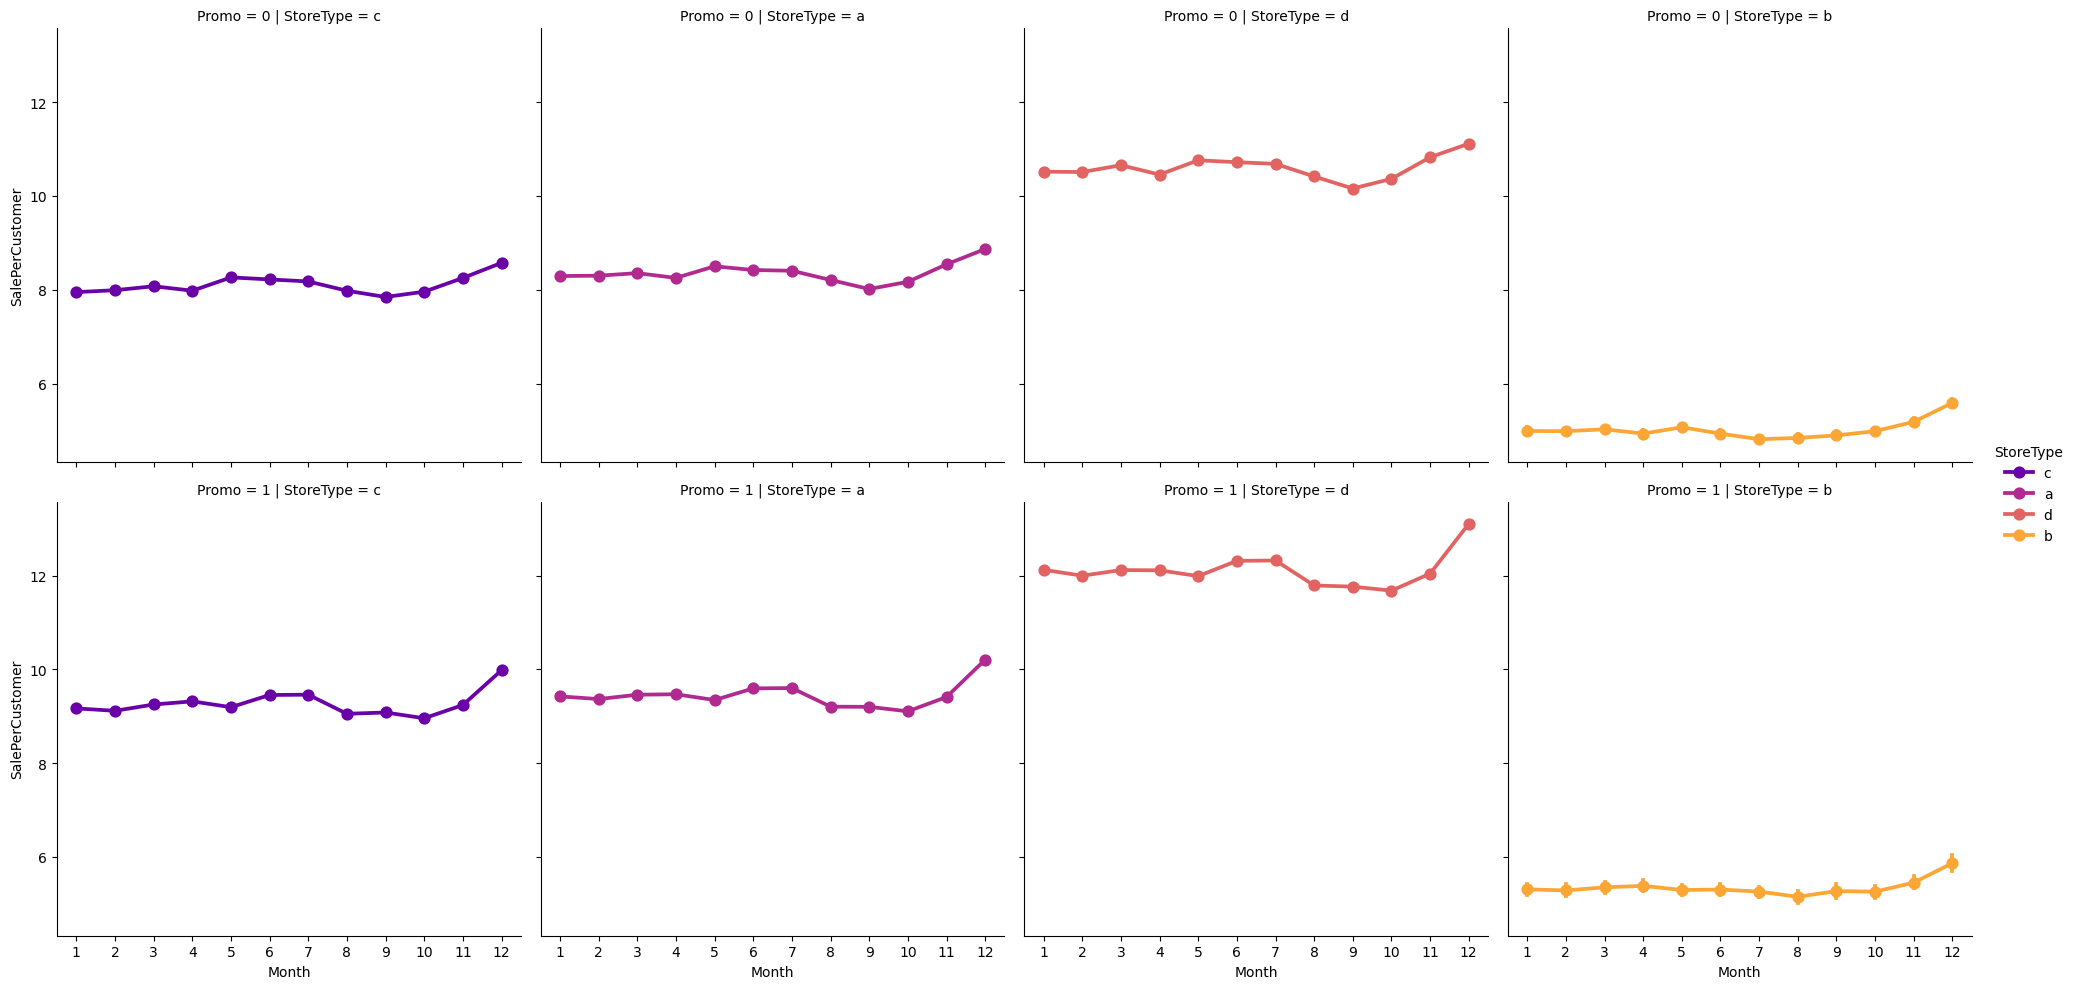

In [85]:

# Gráfico de tendencias de ventas por cliente
sns.catplot(
    data=train_store, 
    x='Month', 
    y='SalePerCustomer', 
    col='StoreType',  # Crear columnas según tipo de tienda
    palette='plasma', 
    hue='StoreType', 
    row='Promo',  # Crear filas según promoción
    kind='point'  # Especificar gráfico de puntos
)
plt.savefig('tendencias_de_ventas_por_clientes.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

Se puede observar consistencia en las tiendas de tipo "a" y tipo "c" en cuanto % de las ventas por clientes. a pesar de que las ventas en las tiendas tipo "b" son altas, las ventas por clientes son bajas lo que indica que los clientes compran articulos de poco valor pero en grande cantidades talves las tiendas estan en zonas concurridas. las tiendas tipo "d" puede que este localizada en lugares alejados para que las personas compren en grandes cantidades.

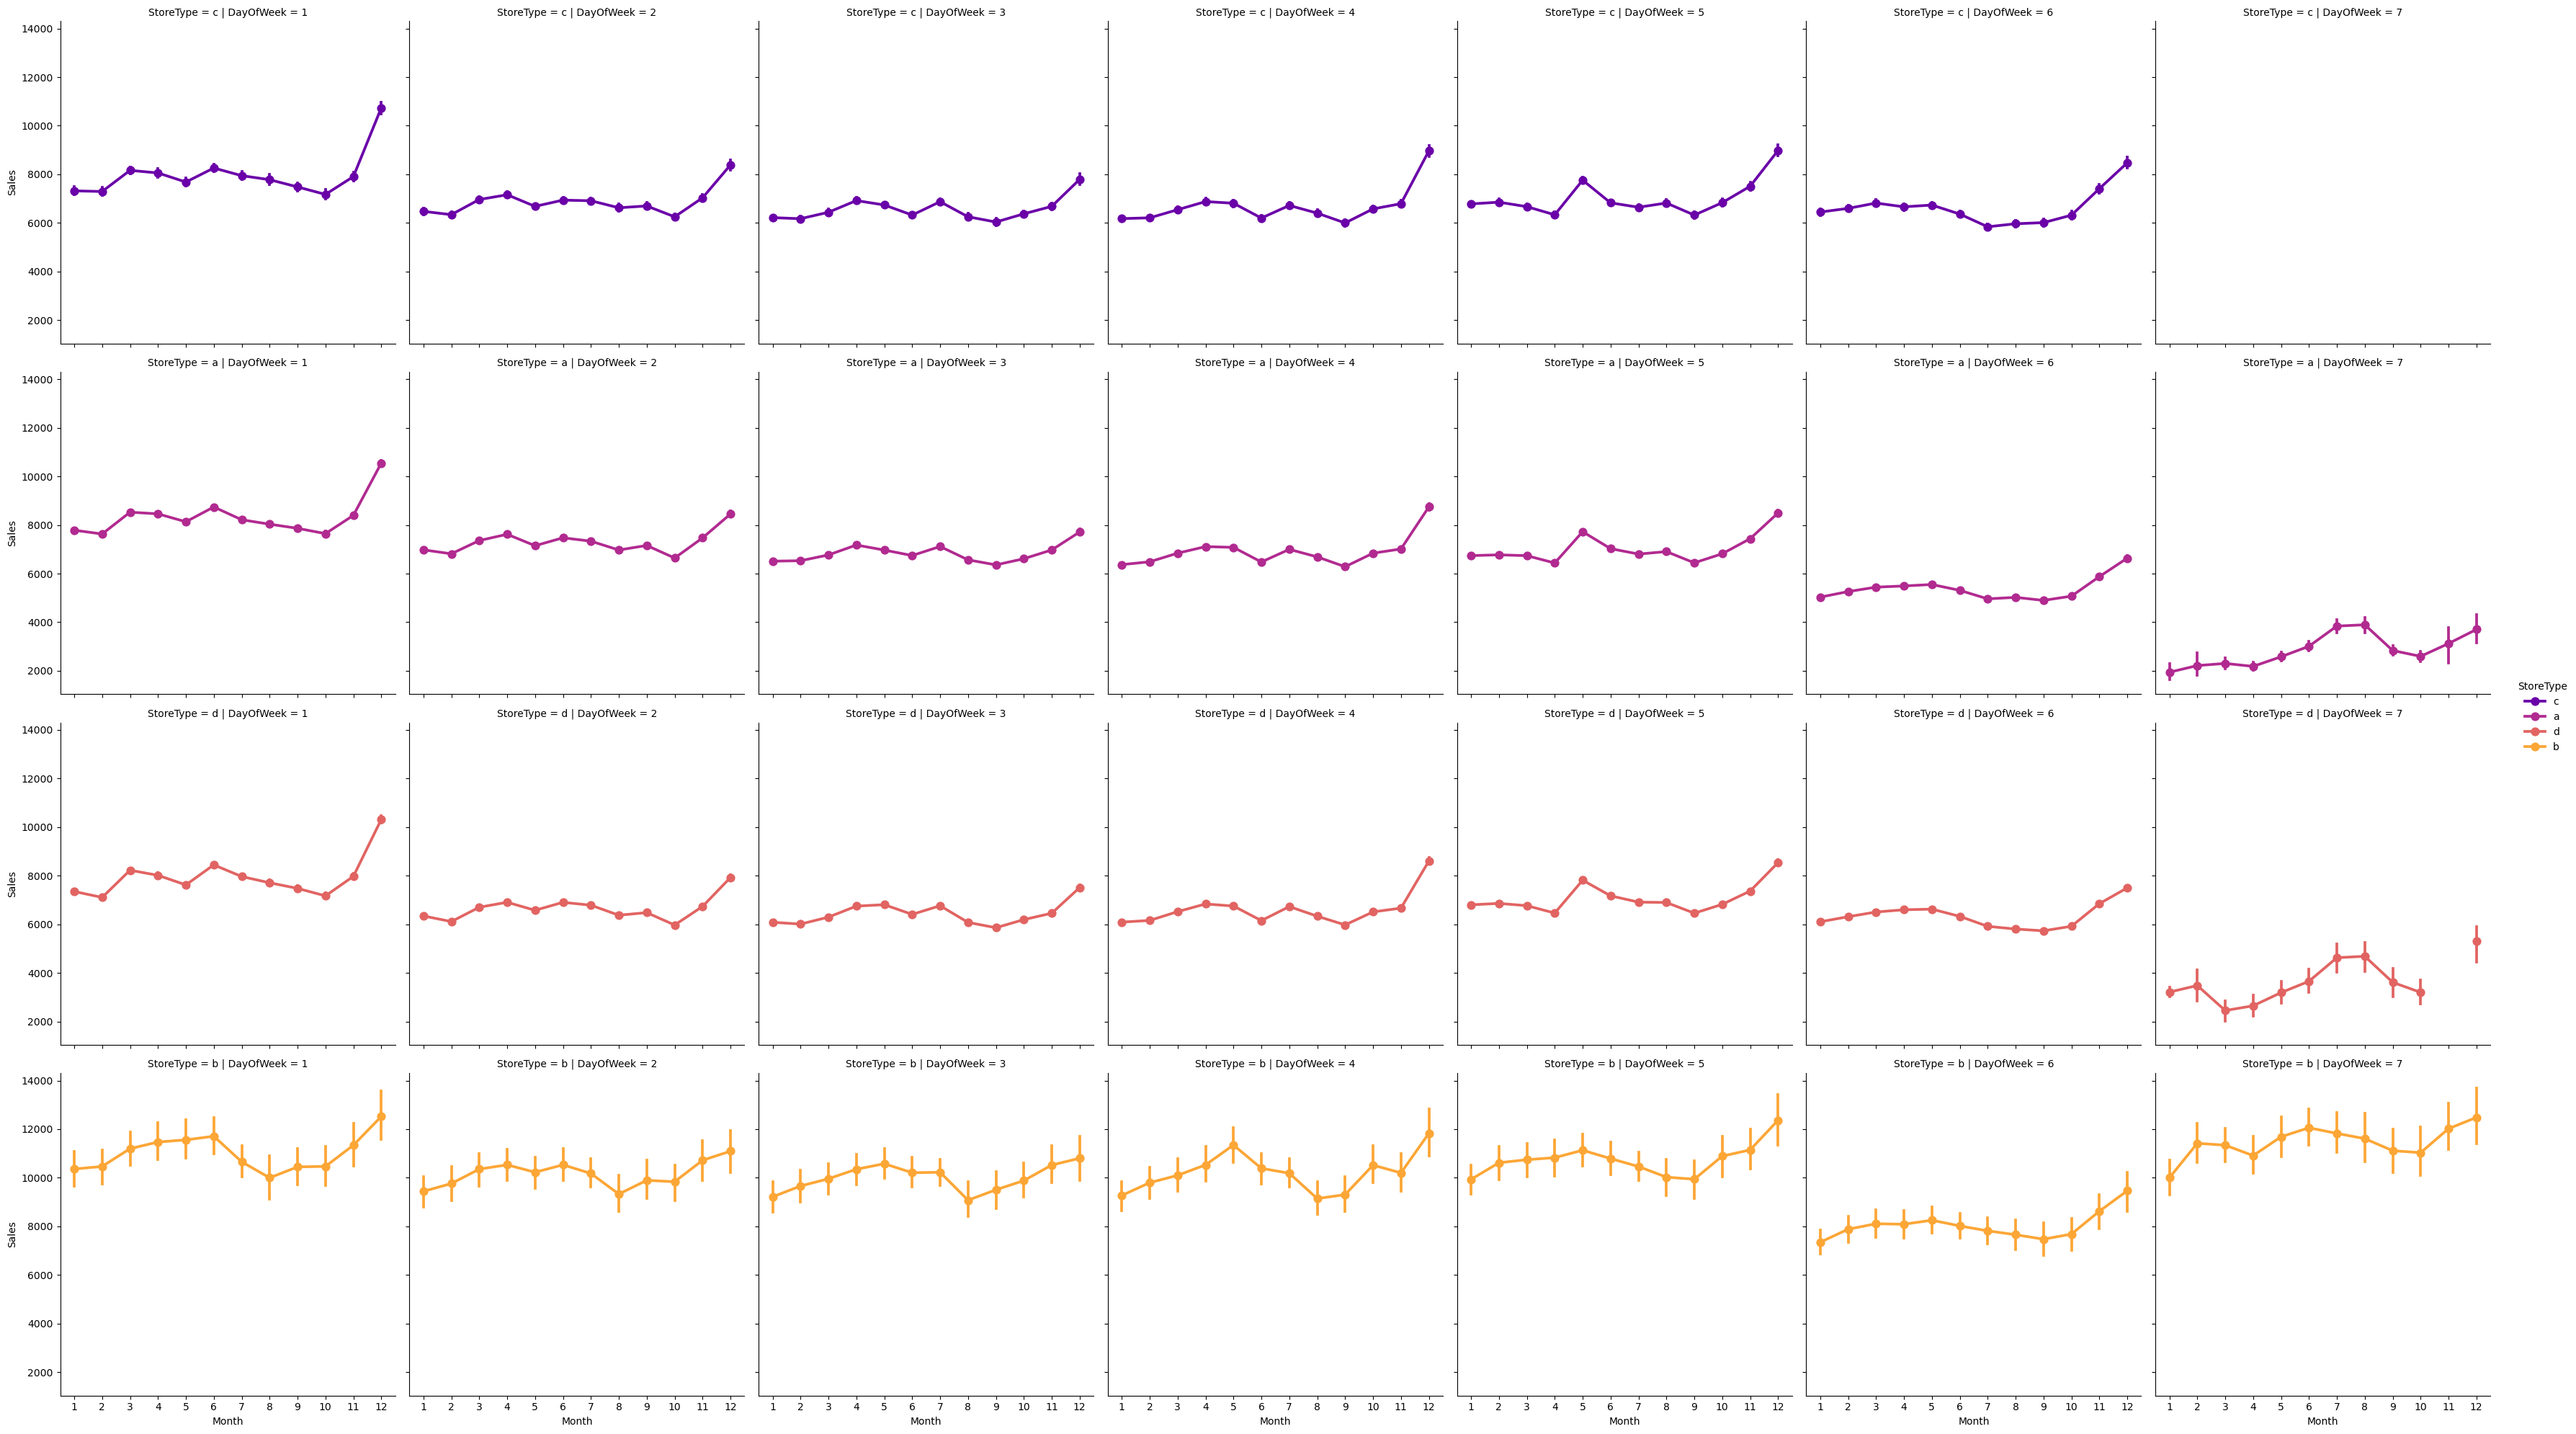

In [87]:
# Tendencias de clientes por tipo de tienda, día de la semana y mes
sns.catplot(
    data=train_store, 
    x='Month', 
    y='Sales', 
    col='DayOfWeek',  # Crear columnas según el día de la semana
    palette='plasma', 
    hue='StoreType',  # Diferenciar por tipo de tienda
    row='StoreType',  # Crear filas según el tipo de tienda
    kind='point'  # Usar un gráfico de puntos para mostrar tendencias
)

plt.show()

vista 1: se observa que la tienda tipo "c" esta cerrada los domingos.
vista 2: se observa que la tienda tipo "a" tiene ventas muy similar a la de tipo "c", pero los domingos las ventas son bajas vs los otros días de la semana.
vista 3: se observa que la tienda tipo "d" estuvo cerrada octubre-noviembre y en diciembre re abrio.
vista 4: se observa que la tienda tipo "b" abre todos los días , tiene ventas constantes e inclusive los días domingos tenemos ventas altas.

In [89]:
# Store que abren los domingos
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877],
      dtype=int64)

Pocas tiendas abren los dia domingos, se agrega dos variables al dataset

In [96]:
train_store.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  ...  SalePerCustomer  StoreType  Assortment  \
0              1  2015  ...             9.48          c           a   
1              1  2015  ...             9.70          a           a   
2              1  2015  ...            10.13          a           a   
3              1  2015  ...             9.34          c           c   
4              1  2015  ...             8.63          a           a   

   CompetitionDistance CompetitionOpenSinceMonth CompetitionOpenSinceYear  \
0             1,270.00                      9.00                 2,008.00   
1               570.00                     11.00                 2,007.00   
2            14,130.00                     12.00                 2,006.00   
3               620.00                      9.00                 2,009.00   
4            29,910.00                      4.00                 2,015.00   

   Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0       0             0.00             0.00                0  
1       1            13.00         2,010.00  Jan,Apr,Jul,Oct  
2       1            14.00         2,011.00  Jan,Apr,Jul,Oct  
3       0             0.00             0.00                0  
4       0             0.00             0.00                0  

[5 rows x 23 columns]

CompetitionOpen: meses compentencia aperturo, PromoOpen: Caclula el tiempo que las promociones han estado activas.

In [61]:
# competition open time (en meses)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# Promedio PromoOpen time and CompetitionOpen time por tipo de tienda
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

Sales  Customers  PromoOpen  CompetitionOpen
StoreType                                                 
a          6,925.70     795.42  12,918.49         7,115.51
b         10,233.38   2,022.21  17,199.33        11,364.50
c          6,933.13     815.54  12,158.64         6,745.42
d          6,822.30     606.35  10,421.92         9,028.53

Tipo B muestra un desempeño superior en todas las métricas: más ventas, más clientes, más tiempo de promoción activa y más tiempo enfrentando competencia.

In [102]:
train_store.head(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   
5      6          5 2015-07-31   5651        589     1      1            0   
6      7          5 2015-07-31  15344       1414     1      1            0   
7      8          5 2015-07-31   8492        833     1      1            0   
8      9          5 2015-07-31   8565        687     1      1            0   
9     10          5 2015-07-31   7185        681     1      1            0   

   SchoolHoliday  Year  ...  Assortment  CompetitionDistance  \
0              1  2015  ...           a             1,270.00   
1              1  2015  ...           a               570.00   
2              1  2015  ...           a            14,130.00   
3              1  2015  ...           c               620.00   
4              1  2015  ...           a            29,910.00   
5              1  2015  ...           a               310.00   
6              1  2015  ...           c            24,000.00   
7              1  2015  ...           a             7,520.00   
8              1  2015  ...           c             2,030.00   
9              1  2015  ...           a             3,160.00   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear Promo2 Promo2SinceWeek  \
0                       9.00                  2,008.00      0            0.00   
1                      11.00                  2,007.00      1           13.00   
2                      12.00                  2,006.00      1           14.00   
3                       9.00                  2,009.00      0            0.00   
4                       4.00                  2,015.00      0            0.00   
5                      12.00                  2,013.00      0            0.00   
6                       4.00                  2,013.00      0            0.00   
7                      10.00                  2,014.00      0            0.00   
8                       8.00                  2,000.00      0            0.00   
9                       9.00                  2,009.00      0            0.00   

   Promo2SinceYear    PromoInterval  CompetitionOpen  PromoOpen  
0             0.00                0            82.00  24,187.75  
1         2,010.00  Jan,Apr,Jul,Oct            92.00      64.50  
2         2,011.00  Jan,Apr,Jul,Oct           103.00      52.25  
3             0.00                0            70.00  24,187.75  
4             0.00                0             3.00  24,187.75  
5             0.00                0            19.00  24,187.75  
6             0.00                0            27.00  24,187.75  
7             0.00                0             9.00  24,187.75  
8             0.00                0           179.00  24,187.75  
9             0.00                0            70.00  24,187.75  

[10 rows x 25 columns]

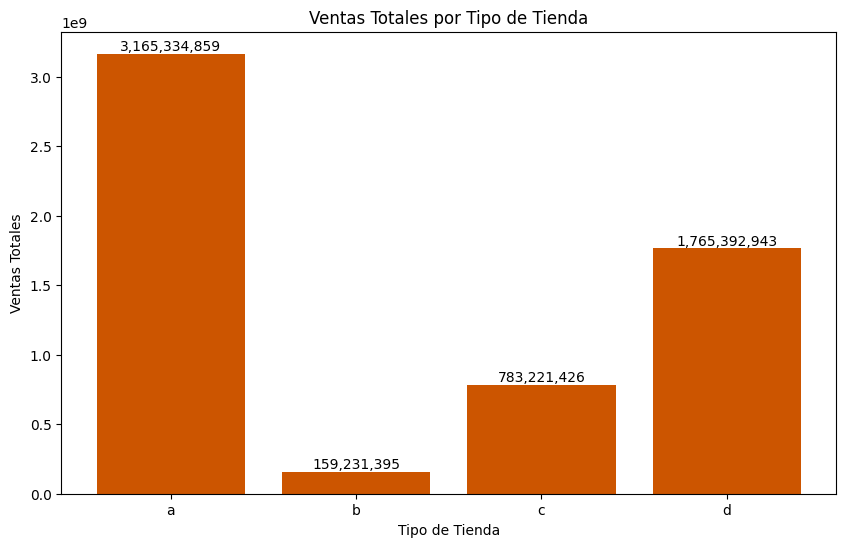

In [73]:
# Ventas totales por tipo de tienda
total_sales = train_store.groupby('StoreType')['Sales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sales.index, total_sales.values, color='#CC5500')

# Agregar los valores exactos con formato de comas encima de las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():,}", ha='center', va='bottom')

plt.title('Ventas Totales por Tipo de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Ventas Totales')
plt.savefig('ventas_total_por_tienda.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

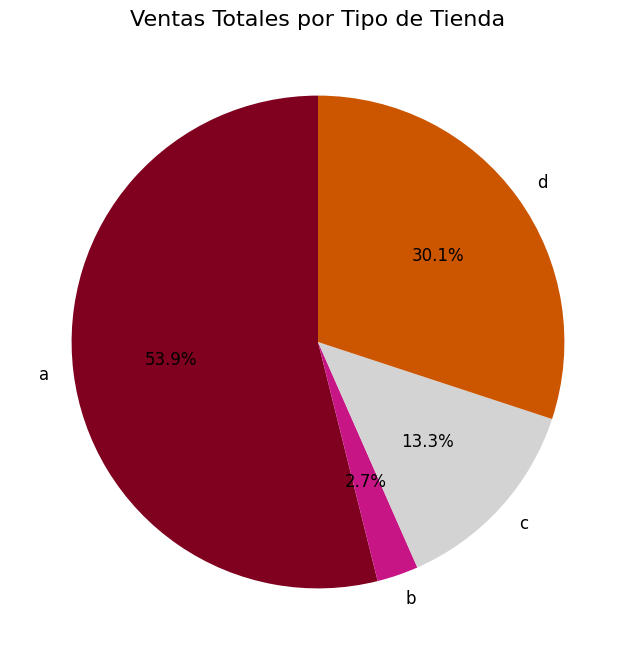

In [95]:
import matplotlib.pyplot as plt

# Agrupar las ventas totales por tipo de tienda
total_sales = train_store.groupby('StoreType')['Sales'].sum()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(total_sales.values, labels=total_sales.index, autopct='%1.1f%%', colors=['#800020', '#C71585', '#D3D3D3', '#CC5500'], startangle=90, textprops={'fontsize': 12})

# Agregar título
plt.title('Ventas Totales por Tipo de Tienda', fontsize=16)

# Guardar la imagen (opcional)
plt.savefig('ventas_totales_pie_chart.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

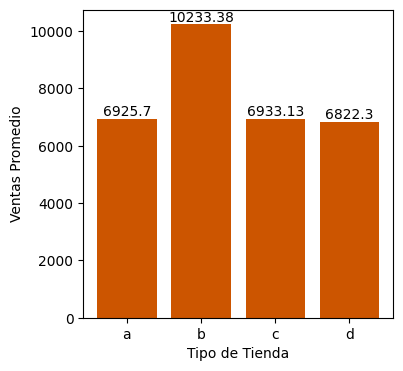

In [99]:

# Ventas promedio por tipo de tienda con etiquetas
avg_sales = train_store.groupby('StoreType')['Sales'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(4, 4))
bars = plt.bar(avg_sales.index, avg_sales.values, color='#CC5500')

# Agregar los valores exactos encima de las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

#plt.title('Ventas Promedio por Tipo de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Ventas Promedio')
plt.savefig('ventas_promedio_por_tienda.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

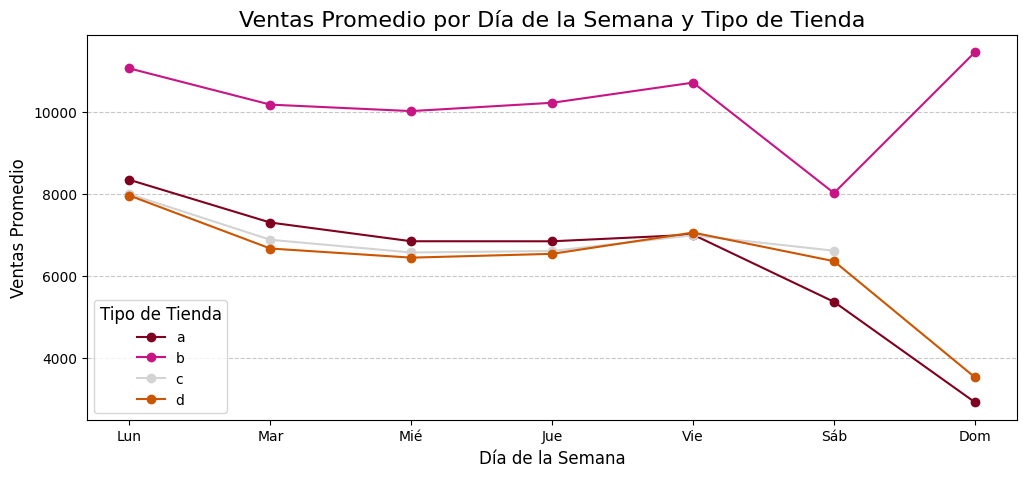

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las ventas promedio por día de la semana y por tipo de tienda
avg_sales_by_day_store = train_store.groupby(['DayOfWeek', 'StoreType'])['Sales'].mean().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))
colors = ['#800020', '#C71585', '#D3D3D3', '#CC5500']  # Colores para los tipos de tienda (puedes agregar más si es necesario)

avg_sales_by_day_store.plot(kind='line', marker='o', color=colors, ax=plt.gca())

# Personalizar el gráfico
plt.title('Ventas Promedio por Día de la Semana y Tipo de Tienda', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks(avg_sales_by_day_store.index, labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'], fontsize=10)
plt.legend(title='Tipo de Tienda', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar la imagen (opcional)
plt.savefig('ventas_promedio_por_dia_tienda.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

0= días normales, a= festivos, b= Semana Santa, c= Navidad


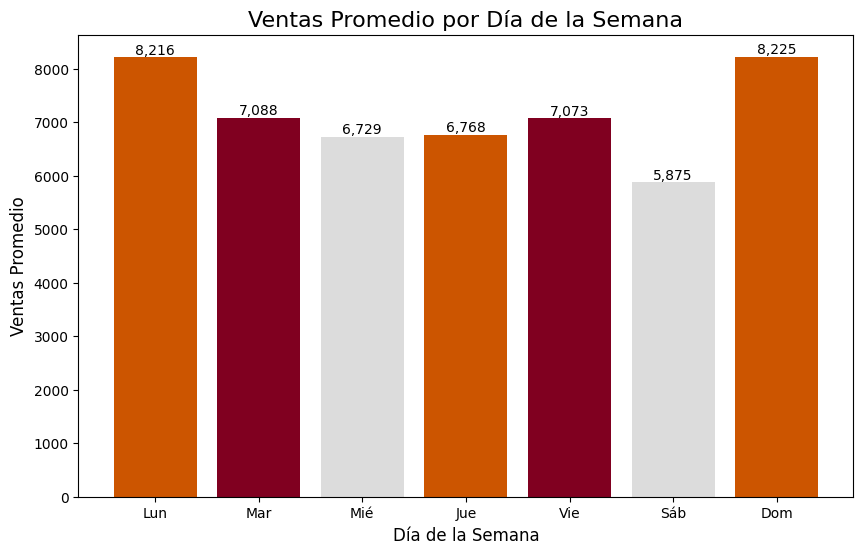

In [105]:
import matplotlib.pyplot as plt

# Agrupar las ventas promedio por día de la semana
average_sales_week = train_store.groupby('DayOfWeek')['Sales'].mean()

# Crear el gráfico de barras
colors = ['#CC5500', '#800020', '#DCDCDC']  # Rojo vino más claro, rosado más oscuro, gris más claro
#colors = ['#A52A2A', '#8B0000', '#DCDCDC']  # Rojo vino más claro, rosado más oscuro, gris más claro

plt.figure(figsize=(10, 6))
bars = plt.bar(average_sales_week.index, average_sales_week.values, color=colors)

# Añadir valores sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.0f}", ha='center', va='bottom')

plt.title('Ventas Promedio por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks(average_sales_week.index, labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'], fontsize=10)

# Guardar y mostrar el gráfico
plt.savefig('ventas_promedio_por_dia.png', dpi=300, bbox_inches='tight')
plt.show()

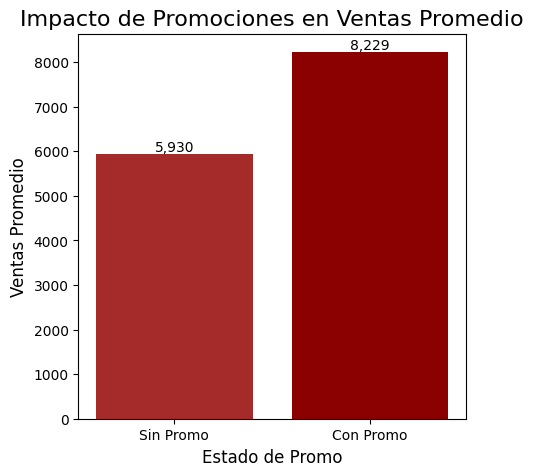

In [125]:
# Agrupar ventas promedio con y sin promociones
promo_sales = train_store.groupby('Promo')['Sales'].mean()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(5, 5))
bars = plt.bar(['Sin Promo', 'Con Promo'], promo_sales.values, color=['#A52A2A', '#8B0000'])

# Añadir valores sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.0f}", ha='center', va='bottom')

plt.title('Impacto de Promociones en Ventas Promedio', fontsize=16)
plt.xlabel('Estado de Promo', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)

# Guardar y mostrar el gráfico
plt.savefig('impacto_promociones.png', dpi=300, bbox_inches='tight')
plt.show()

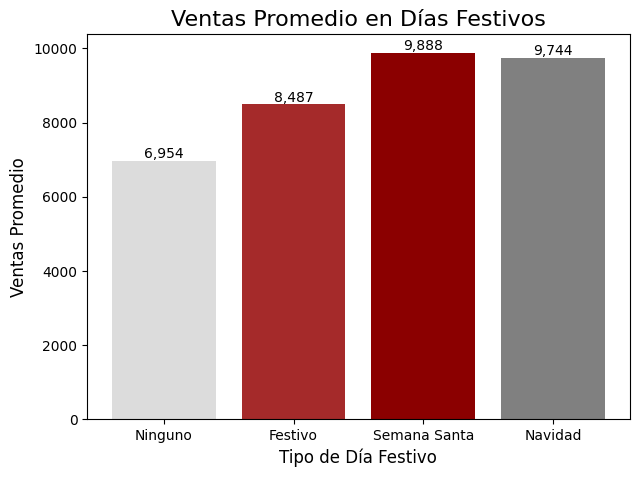

In [131]:
# Agrupar ventas promedio por tipo de día festivo
holiday_sales = train_store.groupby('StateHoliday')['Sales'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))
bars = plt.bar(holiday_sales.index, holiday_sales.values, color=['#DCDCDC', '#A52A2A', '#8B0000', '#808080'])

# Añadir valores sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.0f}", ha='center', va='bottom')

plt.title('Ventas Promedio en Días Festivos', fontsize=16)
plt.xlabel('Tipo de Día Festivo', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks(holiday_sales.index, labels=['Ninguno', 'Festivo', 'Semana Santa', 'Navidad'], fontsize=10)

# Guardar y mostrar el gráfico
plt.savefig('ventas_festivos.png', dpi=300, bbox_inches='tight')
plt.show()

In [108]:
numeric_columns = train_store.drop('Open',axis=1).select_dtypes(include=[np.number])
display(numeric_columns)

Store  DayOfWeek  Sales  Customers  Promo  SchoolHoliday  Year  Month  \
0           1          5   5263        555      1              1  2015      7   
1           2          5   6064        625      1              1  2015      7   
2           3          5   8314        821      1              1  2015      7   
3           4          5  13995       1498      1              1  2015      7   
4           5          5   4822        559      1              1  2015      7   
...       ...        ...    ...        ...    ...            ...   ...    ...   
844333    682          2   3375        566      0              1  2013      1   
844334    733          2  10765       2377      0              1  2013      1   
844335    769          2   5035       1248      0              1  2013      1   
844336    948          2   4491       1039      0              1  2013      1   
844337   1097          2   5961       1405      0              1  2013      1   

        Day  WeekOfYear  SalePerCustomer  CompetitionDistance  \
0        31          31             9.48             1,270.00   
1        31          31             9.70               570.00   
2        31          31            10.13            14,130.00   
3        31          31             9.34               620.00   
4        31          31             8.63            29,910.00   
...     ...         ...              ...                  ...   
844333    1           1             5.96               150.00   
844334    1           1             4.53               860.00   
844335    1           1             4.03               840.00   
844336    1           1             4.32             1,430.00   
844337    1           1             4.24               720.00   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.00                  2,008.00       0   
1                           11.00                  2,007.00       1   
2                           12.00                  2,006.00       1   
3                            9.00                  2,009.00       0   
4                            4.00                  2,015.00       0   
...                           ...                       ...     ...   
844333                       9.00                  2,006.00       0   
844334                      10.00                  1,999.00       0   
844335                       0.00                      0.00       1   
844336                       0.00                      0.00       0   
844337                       3.00                  2,002.00       0   

        Promo2SinceWeek  Promo2SinceYear  CompetitionOpen  PromoOpen  
0                  0.00             0.00            82.00  24,187.75  
1                 13.00         2,010.00            92.00      64.50  
2                 14.00         2,011.00           103.00      52.25  
3                  0.00             0.00            70.00  24,187.75  
4                  0.00             0.00             3.00  24,187.75  
...                 ...              ...              ...        ...  
844333             0.00             0.00            76.00  24,156.25  
844334             0.00             0.00           159.00  24,156.25  
844335            48.00         2,012.00        24,157.00       0.25  
844336             0.00             0.00        24,157.00  24,156.25  
844337             0.00             0.00           130.00  24,156.25  

[844338 rows x 19 columns]

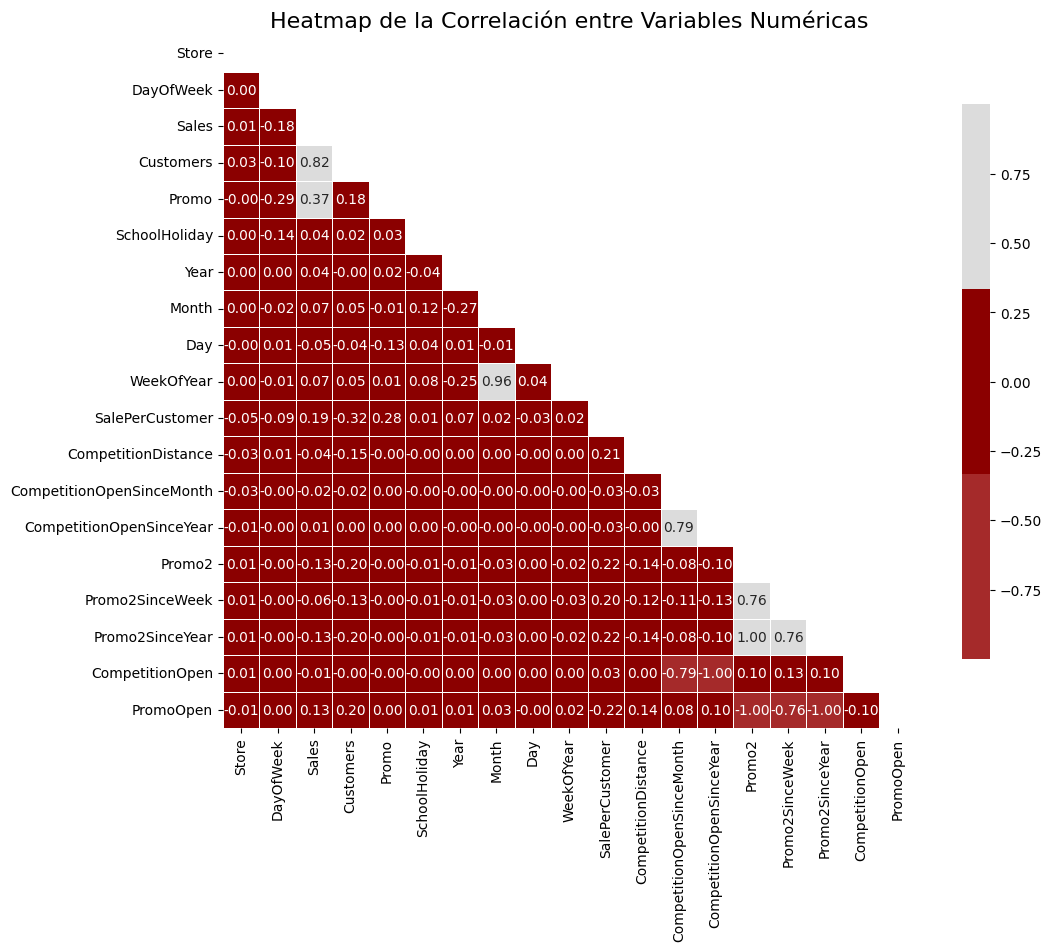

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
numeric_columns = train_store.drop('Open', axis=1).select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_numeric = numeric_columns.corr()

# Generar la máscara para ocultar el triángulo superior
mask = np.triu(np.ones_like(corr_numeric, dtype=bool))

# Configurar la figura de Matplotlib
f, ax = plt.subplots(figsize=(12, 9))

# Dibujar el Heatmap con los colores personalizados
cmap = sns.color_palette(["#A52A2A", "#8B0000", "#DCDCDC"])  # Rojo vino más claro, rosado más oscuro, gris más claro
sns.heatmap(
    corr_numeric, 
    mask=mask, 
    annot=True,  # Mostrar valores
    square=True, 
    linewidths=0.5, 
    ax=ax, 
    cmap=cmap,  # Paleta personalizada
    fmt='.2f',  # Mostrar valores con dos decimales
    cbar_kws={"shrink": 0.8}  # Tamaño de la barra de color
)

# Título estilizado
plt.title("Heatmap de la Correlación entre Variables Numéricas", fontsize=16)
plt.savefig('heatmap_correlacion_variables_custom.png', dpi=300, bbox_inches='tight')  # Guardar la imagen con el nombre adecuado

# Mostrar la gráfica
plt.show()

Fuerte correlacion Sales y Customers. Sales y Promo Open. Sales y SaleperCustomer. Promo y promo 2 tiene correlacion positiva ambas promo aumentan cliente pero no tan significativo. Promo 1 parece mas popular. la CompetitionDistance y SaleperCustomer tiene un impacto positivo .

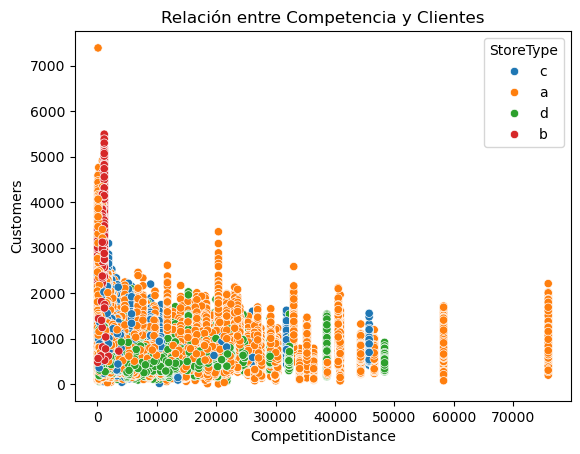

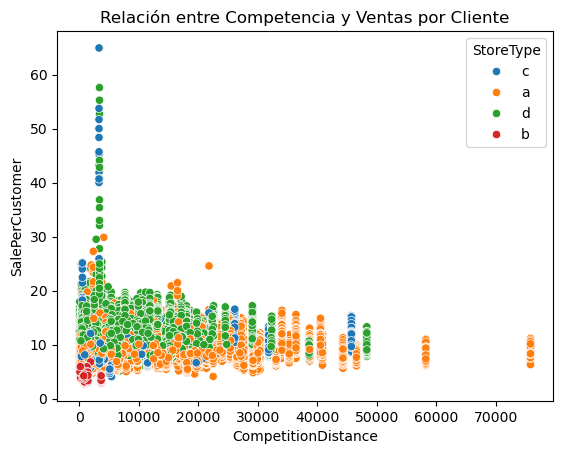

In [113]:
sns.scatterplot(data=train_store, x='CompetitionDistance', y='Customers', hue='StoreType')
plt.title('Relación entre Competencia y Clientes')
plt.show()

sns.scatterplot(data=train_store, x='CompetitionDistance', y='SalePerCustomer', hue='StoreType')
plt.title('Relación entre Competencia y Ventas por Cliente')
plt.show()

In [114]:
print(train_store.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpen', 'PromoOpen'],
      dtype='object')


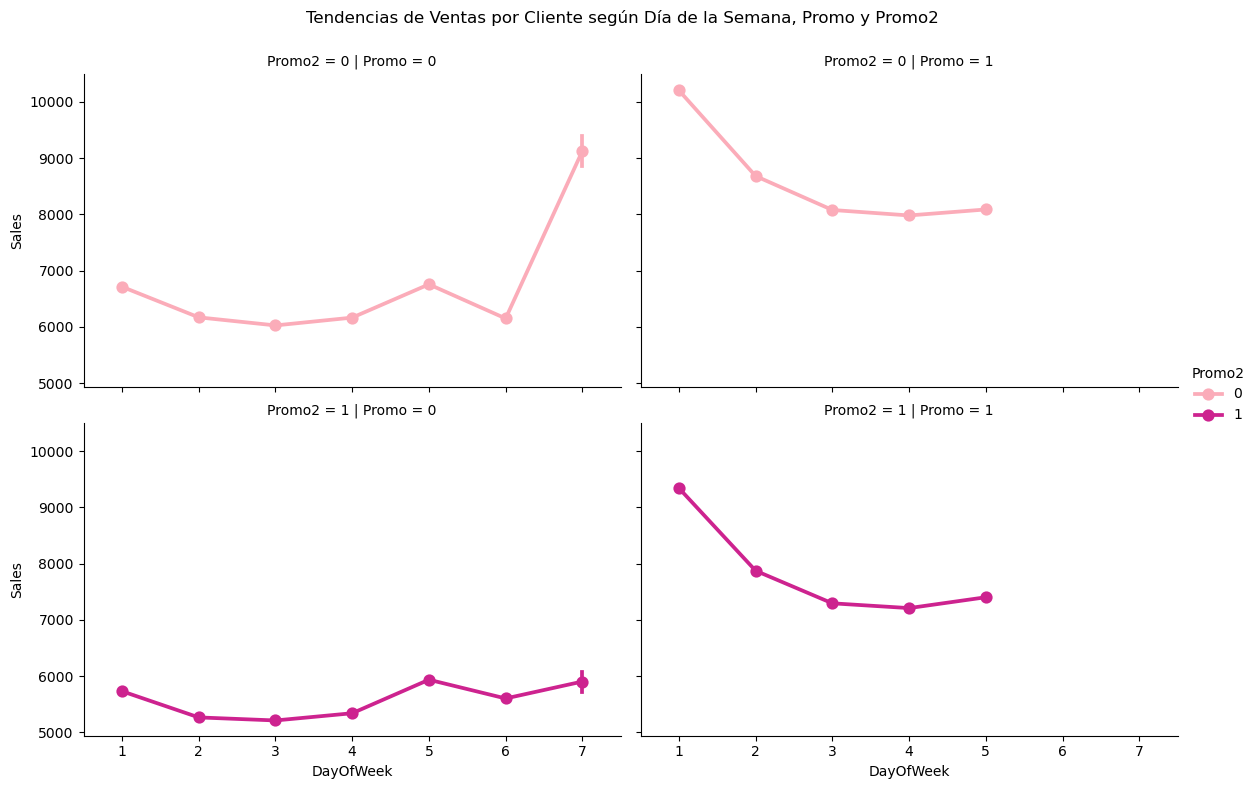

In [115]:


# Visualizar las tendencias de ventas por cliente
sns.catplot(
    data=train_store, 
    x='DayOfWeek', 
    y='Sales', 
    col='Promo', 
    row='Promo2', 
    hue='Promo2', 
    kind='point',  # Usar gráfico de puntos para mostrar tendencias
    palette='RdPu', 
    height=4, 
    aspect=1.5
)

plt.subplots_adjust(top=0.9)  # Ajustar para evitar superposición de títulos
plt.suptitle("Tendencias de Ventas por Cliente según Día de la Semana, Promo y Promo2")
plt.show()

Cuando no hay promociones, las ventas son normales, pero los domingos las ventas son altas. El tipo de tienda C cierra los domingos.
La promoción 1 tiene mejores resultados que la promoción 2. La promoción 2 por sí sola no puede hacer mucha diferencia en las ventas.
Siempre el 5º día de la semana las ventas son altas, puede tratarse de compras de fin de semana.
Las ventas del primer día de la promoción son elevadas, lo que puede deberse a la campaña de venta por orden de llegada de las tiendas.
La promo esta dando mejores resultados.

In [118]:
# Seleccionar únicamente las variables relevantes
X = train_store[['Customers', 'Promo']]  # Añade cualquier otra columna relevante aquí
y = train_store['Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Generar predicciones
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular las métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 1620.1434893672517
MAE: 1155.3776459658761
R²: 0.7279810442155603


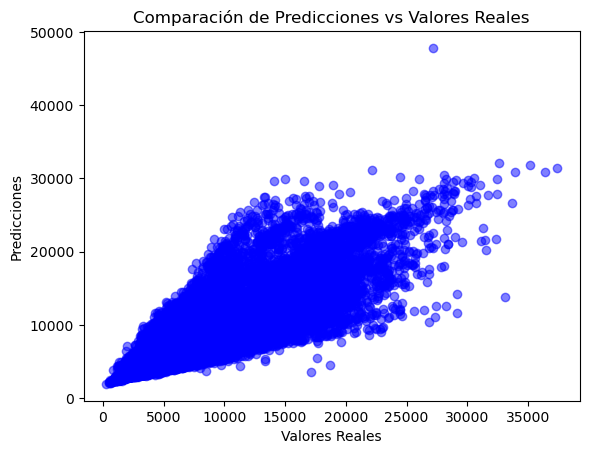

In [129]:
import matplotlib.pyplot as plt

# Comparar predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

In [130]:
# Seleccionar solo la variable Customers como predictora
X = train_store[['Customers']]
y = train_store['Sales']

# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
# Generar predicciones
y_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 1758.594462590604
MAE: 1271.2445714184637
R²: 0.6795032632259941


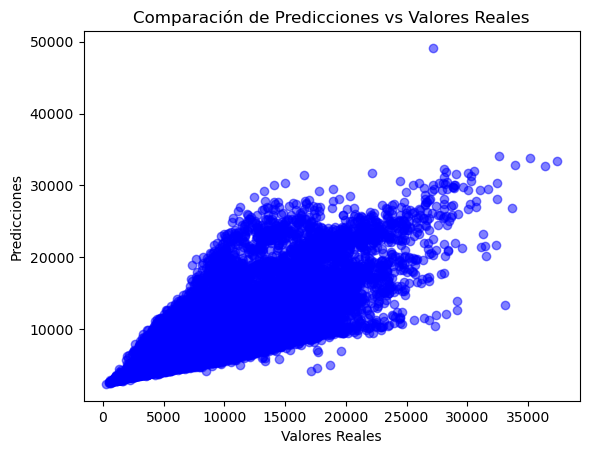

In [139]:
import matplotlib.pyplot as plt

# Comparar predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

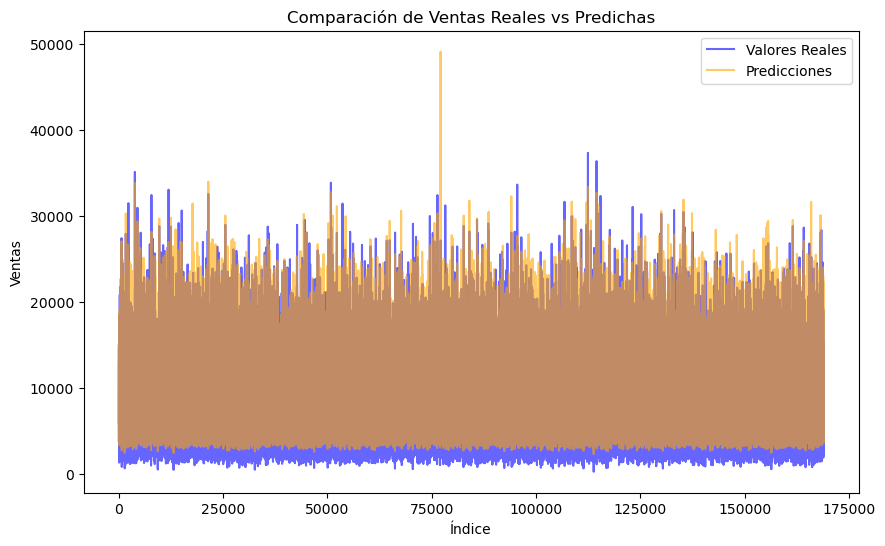

In [141]:
import matplotlib.pyplot as plt

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicciones', color='orange', alpha=0.6)
plt.legend()
plt.title('Comparación de Ventas Reales vs Predichas')
plt.xlabel('Índice')
plt.ylabel('Ventas')
plt.show()

In [142]:
# Crear segmentos de ventas
data_test = X_test.copy()
data_test['Real'] = y_test
data_test['Predicción'] = y_pred
data_test['Error'] = data_test['Real'] - data_test['Predicción']

# Evaluar por segmentos
data_test['Segmento'] = pd.qcut(data_test['Real'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Media del error por segmento
print(data_test.groupby('Segmento')['Error'].mean())

Segmento
Bajo         -1,182.51
Medio-Bajo     -482.21
Medio-Alto      217.06
Alto          1,446.58
Name: Error, dtype: float64


C:\Users\aritz\AppData\Local\Temp\ipykernel_25504\3107784041.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_test.groupby('Segmento')['Error'].mean())


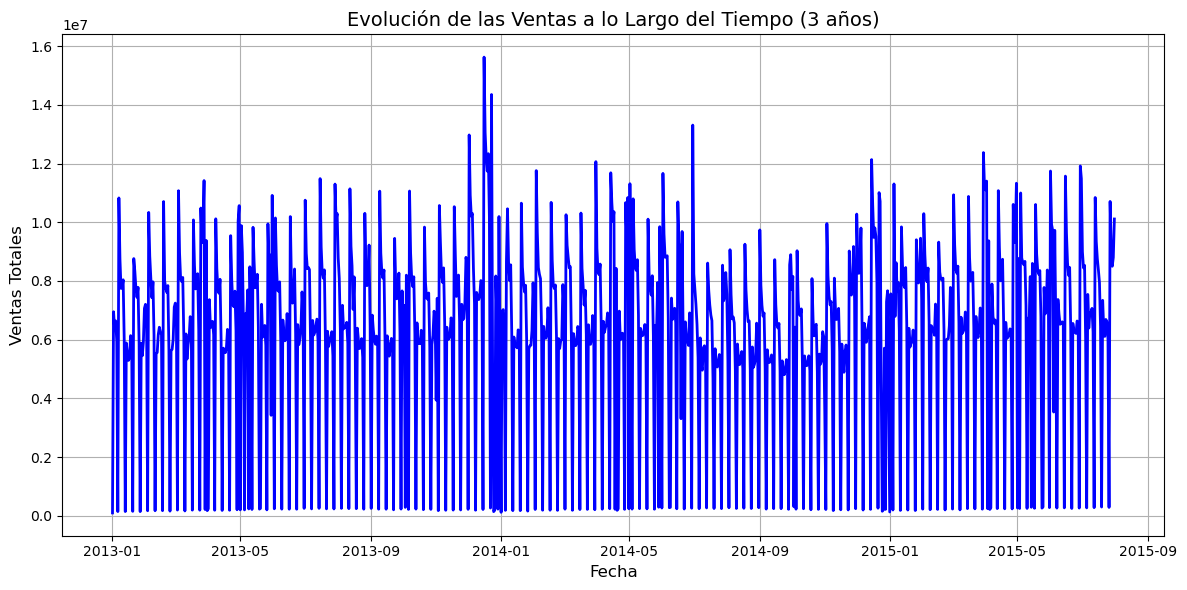

In [145]:

# Asegurarte de que la columna 'Date' esté en formato datetime
train_store['Date'] = pd.to_datetime(train_store['Date'])

# Agrupar las ventas por fecha (suma diaria)
sales_over_time = train_store.groupby('Date')['Sales'].sum()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.plot(sales_over_time.index, sales_over_time.values, color='blue', linewidth=2)

# Etiquetas y título
plt.title('Evolución de las Ventas a lo Largo del Tiempo (3 años)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.grid(True)  # Agrega una cuadrícula para facilitar la lectura
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se corten
plt.savefig('evolucion_ventas.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()

In [151]:
# Guardar el gráfico como imagen
plt.savefig('evolucion_ventas.png', dpi=300, bbox_inches='tight')  # Cambia el nombre si lo necesitas
plt.show()


<Figure size 640x480 with 0 Axes>

In [72]:
!pip install pycaret

In [124]:
dataset_train_store =  train_store[['Customers', 'Promo','Sales']]  

In [82]:
dataset_train_store.head(5)

Customers  Promo  Sales
0        555      1   5263
1        546      1   5020
2        523      1   4782
3        560      1   5011
4        612      1   6102

In [84]:
from pycaret.regression import *

In [106]:

from pycaret.regression import *

# Inicializa PyCaret (sustituye 'ventas' por el nombre real de tu variable objetivo)
reg = setup(data=dataset_train_store, target='Sales', session_id=123, train_size=0.8, normalize=True)


In [88]:
best_model = compare_models()


In [108]:
tuned_model = tune_model(best_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


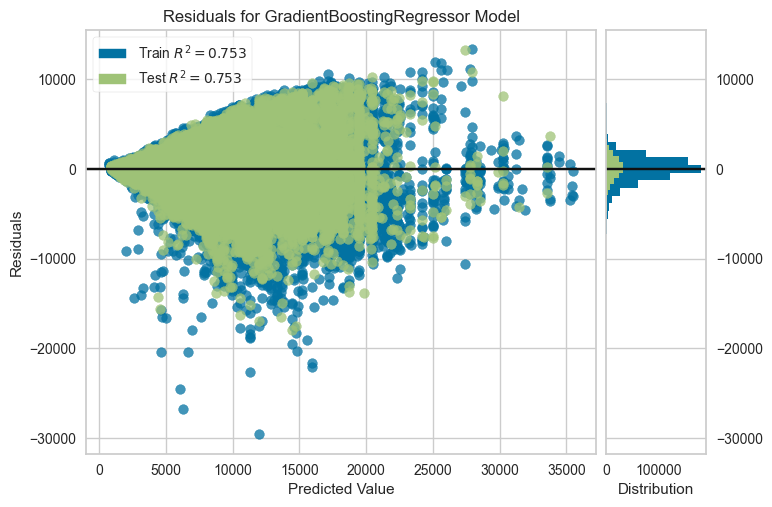

In [112]:
plot_model(tuned_model, plot='residuals')


In [114]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.3/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.8/150.0 MB 3.0 MB/s eta 0:00:51
    --------------------------------------- 2.4/150.0 MB 2.7 MB/s eta 0:00:55
    --------------------------------------- 2.9/150.0 MB 2.7 MB/s eta 0:00:56
    --------------------------------------- 3.1/150.0 MB 2.5 MB/s eta 0:01:00
   - -------------------------------------- 3.9/150.0 MB 2.6 MB/s eta 0:00:58
   - -------------------------------------- 4.5/150.0 MB 2.6 MB/s eta 0:00:57
   - -------------------------------------- 5.2/150.0 MB 2.7 MB/s eta 0:00:54
   - -------------------------------------- 5.8/150.0 MB 2.7 MB/s eta 0:00:54
   - -------------------------------------- 6.3/150.0 MB 2.7 MB/s eta 0:00:54


In [126]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que tienes tu dataframe df y la variable objetivo 'sales'
X = dataset_train_store.drop('Sales', axis=1)  # Características
y = dataset_train_store['Sales']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 1114.4576949583495
MSE: 2383203.50854236
RMSE: 1543.7627759932418
R²: 0.74986666541643


In [128]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que tienes tu dataframe df y la variable objetivo 'sales'
X = dataset_train_store.drop('Sales', axis=1)  # Características
y = dataset_train_store['Sales']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


  File "C:\Users\aritz\anaconda3\envs\pycaret_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\aritz\anaconda3\envs\pycaret_env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\aritz\anaconda3\envs\pycaret_env\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aritz\anaconda3\envs\pycaret_env\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 675470, number of used features: 2
[LightGBM] [Info] Start training from score 6959.714939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que tienes tu dataframe df y la variable objetivo 'sales'
X = dataset_train_store.drop('Sales', axis=1)  # Características
y = dataset_train_store['Sales']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor()

# Definir el rango de hiperparámetros para el GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9, 1.0]
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Usar el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones y evaluar el rendimiento
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f'R² con los mejores parámetros: {r2}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 450313, number of used features: 2
[LightGBM] [Info] Start training from score 6957.974162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai